✅ Titanic dataset loaded successfully!

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

First 5 Rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         

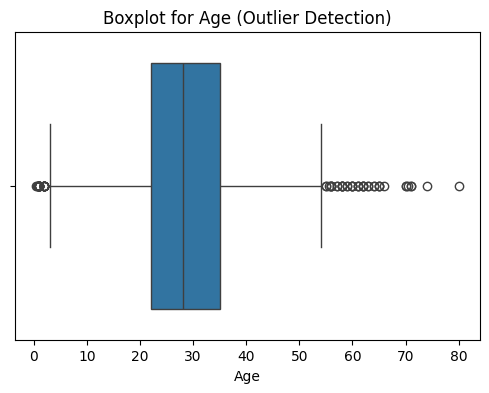

Detected 66 outliers in Age column

After Encoding:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53

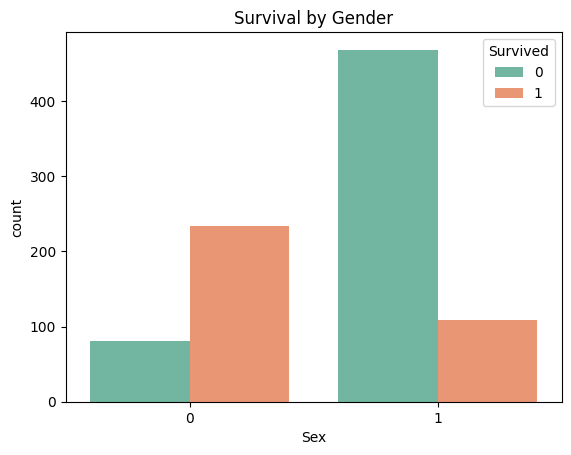

In [1]:
# week2_data_preprocessing_visualization.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# 1. Load Dataset
df = pd.read_csv("titanic.csv")
print("✅ Titanic dataset loaded successfully!\n")

# 2. Basic Info
print("Dataset Info:\n")
print(df.info(), "\n")
print("First 5 Rows:\n", df.head(), "\n")

# ---------------------------------------------------
# 📌 Data Cleaning
# ---------------------------------------------------
print("Missing Values Before:\n", df.isnull().sum(), "\n")

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many missing values)
df = df.drop(columns=['Cabin'])

print("Missing Values After:\n", df.isnull().sum(), "\n")

# Remove duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"🧹 Removed {before - after} duplicate rows.\n")

# ---------------------------------------------------
# 📌 Outlier Detection (Boxplot & IQR method)
# ---------------------------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot for Age (Outlier Detection)")
plt.show()

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Age'] < Q1 - 1.5*IQR) | (df['Age'] > Q3 + 1.5*IQR)]
print(f"Detected {outliers.shape[0]} outliers in Age column\n")

# ---------------------------------------------------
# 📌 Feature Encoding
# ---------------------------------------------------
# Label Encoding (Sex)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male=1, Female=0

# One-Hot Encoding (Embarked)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("After Encoding:\n", df.head(), "\n")

# ---------------------------------------------------
# 📌 Feature Scaling
# ---------------------------------------------------
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print("After Scaling Age & Fare:\n", df[['Age','Fare']].head(), "\n")

# ---------------------------------------------------
# 📌 Visualization
# ---------------------------------------------------
# 1. Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df, palette="Set2")
plt.title("Survival by Gender")
plt.show()


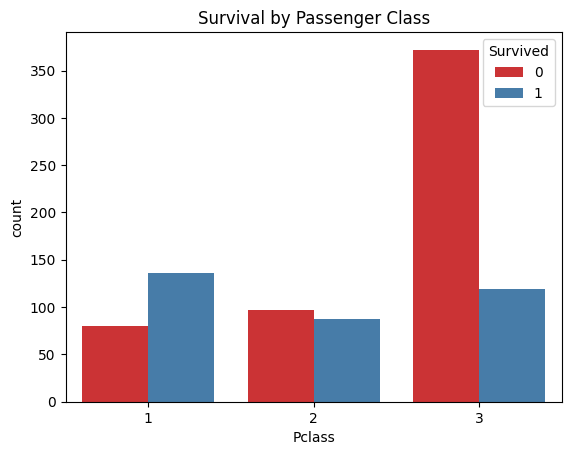

In [2]:

# 2. Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df, palette="Set1")
plt.title("Survival by Passenger Class")
plt.show()


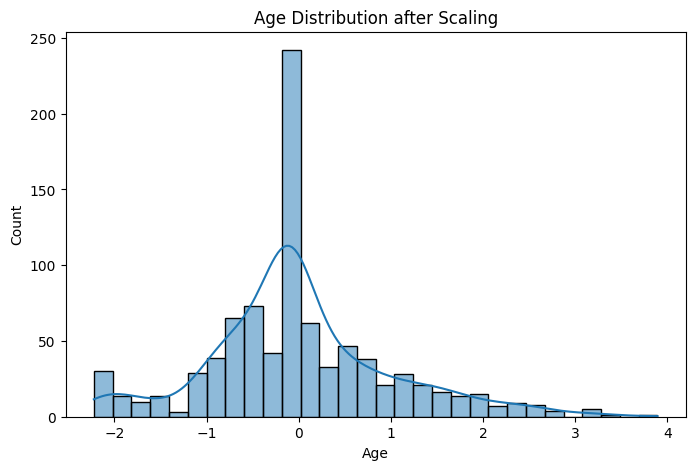

In [3]:

# 3. Histogram of Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution after Scaling")
plt.show()


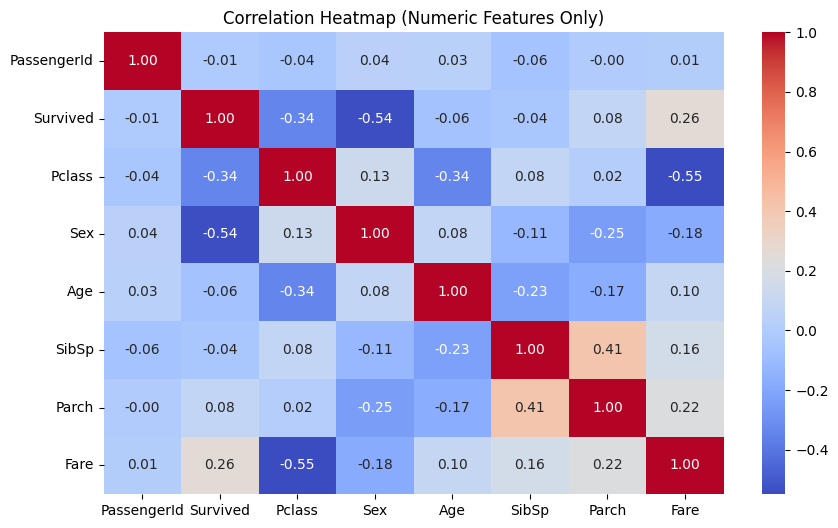

In [6]:
# 4. Correlation Heatmap (fixed for Titanic dataset)
plt.figure(figsize=(10,6))

# keep only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [7]:

# ---------------------------------------------------
# 📌 Mini Project: EDA Summary
# ---------------------------------------------------
print("🔍 EDA Summary:")
print("- Passengers Survived:", df['Survived'].sum())
print("- Passengers Died:", len(df) - df['Survived'].sum())
print("- Survival Rate by Gender:\n", df.groupby('Sex')['Survived'].mean()*100, "\n")
print("- Survival Rate by Class:\n", df.groupby('Pclass')['Survived'].mean()*100, "\n")


🔍 EDA Summary:
- Passengers Survived: 342
- Passengers Died: 549
- Survival Rate by Gender:
 Sex
0    74.203822
1    18.890815
Name: Survived, dtype: float64 

- Survival Rate by Class:
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64 

